# Overview of this jupyter notebook

1. Plotting OCC results
2. Plotting MLC transformation based BR results
3. Plotting MLC adaption based results

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, cross_validate
from sklearn.model_selection import cross_val_predict
import pickle
import json
import random

In [2]:
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tqdm.notebook import tqdm_notebook as tq
from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
import os
import importlib
from library import faps_color as fapsc        # this module contains the color combination of FAPS Institute
from library import classification_helper as ch  # this module contains helper functions for the classification task
print(importlib.reload(etl))
print(importlib.reload(fapsc))
print(importlib.reload(ch))

<module 'library.etl_data' from 'C:\\Users\\songs\\OneDrive\\Desktop\\0. MA_FAPS\\04_Code\\library\\etl_data.py'>
<module 'library.faps_color' from 'C:\\Users\\songs\\OneDrive\\Desktop\\0. MA_FAPS\\04_Code\\library\\faps_color.py'>
<module 'library.classification_helper' from 'C:\\Users\\songs\\OneDrive\\Desktop\\0. MA_FAPS\\04_Code\\library\\classification_helper.py'>


In [4]:
# GPU check

if len(tf.config.list_physical_devices('GPU')) > 0:
    print("TensorFlow version: ", tf.__version__)
    print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
    print("Name: ", tf.test.gpu_device_name())
else:
    print("TensorFlow version: ", tf.__version__)
    print("GPU is not available")

TensorFlow version:  2.8.0
Num GPUs Available:  1
Name:  /device:GPU:0


In [5]:
!python -V

Python 3.10.6


# 1. Plotting OCC results

In [6]:
with open("results/occ_hyperopt_results_v2.4.1.json", "r") as f:
    res = json.load(f)

In [7]:
rec = []
acc = []

for key in res:
    rec.append(np.round(res[key]["rec"]*100, 1))
    acc.append(np.round(res[key]["acc"]*100, 1))
    
rec

[98.7, 99.0, 85.4, 100.0, 100.0, 99.7, 87.4, 79.1, 47.6]

In [8]:
acc

[98.8, 98.7, 85.7, 100.0, 100.0, 99.7, 88.1, 80.4, 51.1]

In [9]:
xtickslist = [f"Fenster-\n technik", f"OC-SVM\n tsfresh", f"OC-SVM\n CAE Encoder", f"CAE val", f"CAE std", f"CAE max",
              f"CAE early\n pred val", f"CAE early\n pred std", f"CAE early\n pred max"]
xtickslist

['Fenster-\n technik',
 'OC-SVM\n tsfresh',
 'OC-SVM\n CAE Encoder',
 'CAE val',
 'CAE std',
 'CAE max',
 'CAE early\n pred val',
 'CAE early\n pred std',
 'CAE early\n pred max']

In [14]:
print(importlib.reload(ch))

<module 'library.classification_helper' from 'C:\\Users\\songs\\OneDrive\\Desktop\\0. MA_FAPS\\04_Code\\library\\classification_helper.py'>


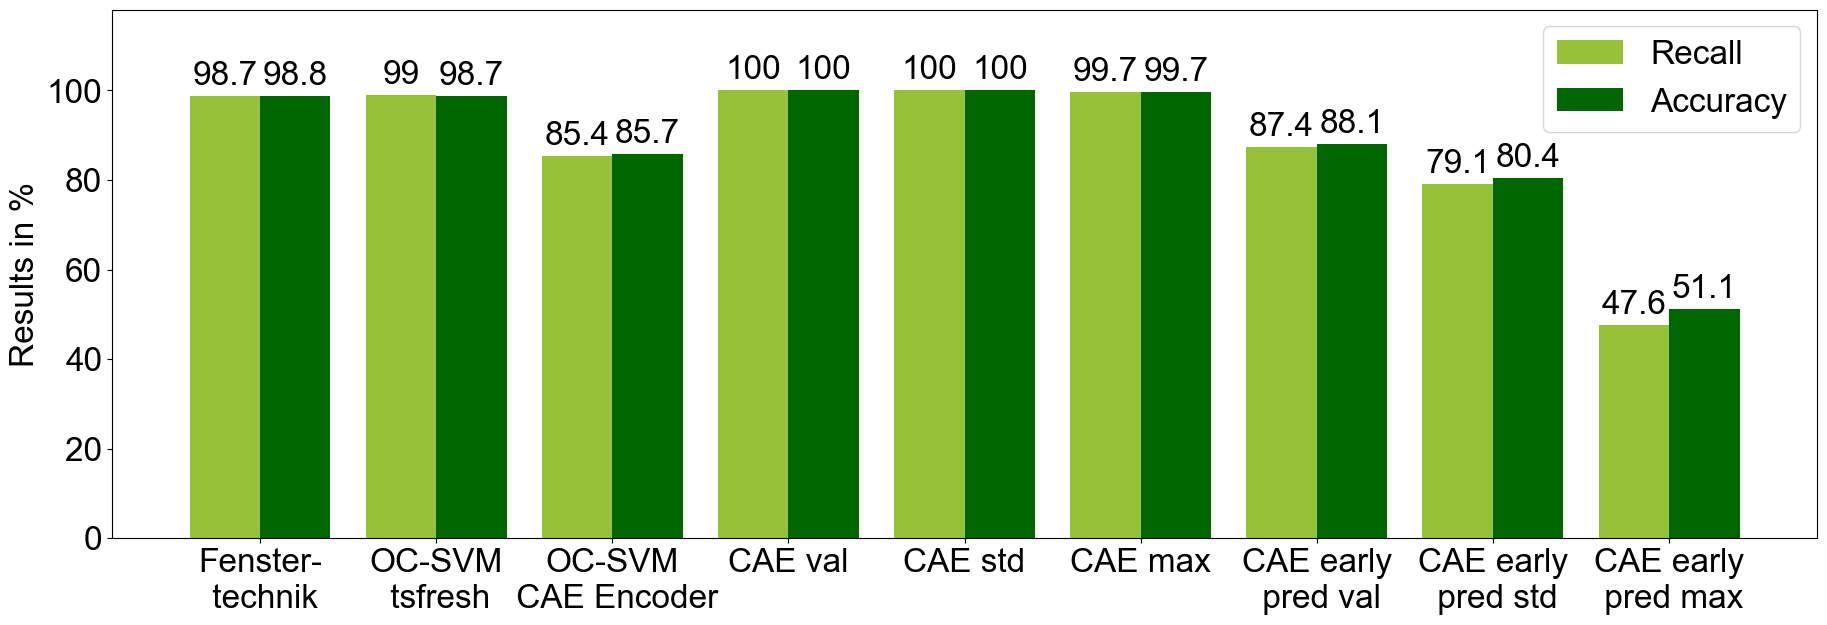

In [25]:
ch.grouped_barplot(leftlist=rec, leftlabel='Recall', leftcolor=fapsc.green, 
                   rightlist=acc, rightlabel='Accuracy', rightcolor=fapsc.dark_green, 
                   title='', 
                   xtickslist=xtickslist, ylim=(0, 118),
                   size=(22,7), fontsize=24)

In [111]:
cms = [] 

for key in res:
    cms.append(res[key]["cm"])
    
cms

[[[50, 0], [9, 691]],
 [[47, 3], [7, 693]],
 [[45, 5], [102, 598]],
 [[50, 0], [0, 700]],
 [[50, 0], [0, 700]],
 [[50, 0], [2, 698]],
 [[49, 1], [88, 612]],
 [[49, 1], [146, 554]],
 [[50, 0], [367, 333]]]

In [139]:
print(importlib.reload(ch))

<module 'library.classification_helper' from 'C:\\Users\\songs\\OneDrive\\Desktop\\0. MA_FAPS\\04_Code\\library\\classification_helper.py'>


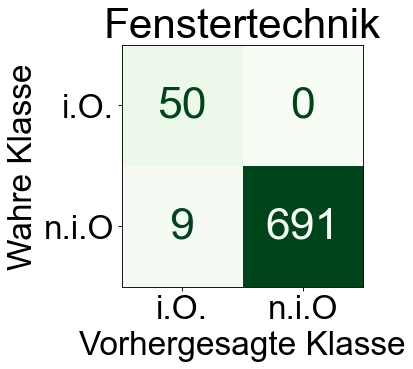

In [152]:
ch.plot_calc_cm(None, None, ["i.O.", "n.i.O"], cm=np.array(cms[0]), title=f"Fenstertechnik", figsize=(4,4), 
                dpi=80, fontsize=30, fontsize_cm=16)

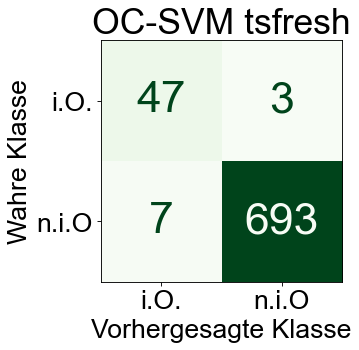

In [141]:
ch.plot_calc_cm(None, None, ["i.O.", "n.i.O"], cm=np.array(cms[1]), title=f"OC-SVM tsfresh", figsize=(4,4), 
                dpi=80, fontsize=24, fontsize_cm=16)

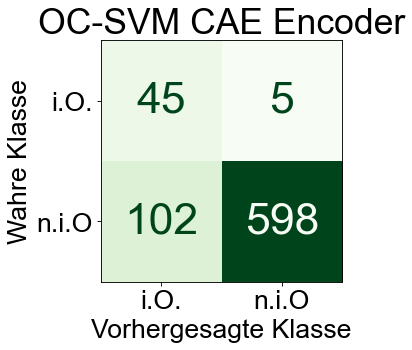

In [142]:
ch.plot_calc_cm(None, None, ["i.O.", "n.i.O"], cm=np.array(cms[2]), title=f"OC-SVM CAE Encoder", figsize=(4,4), 
                dpi=80, fontsize=24, fontsize_cm=16)

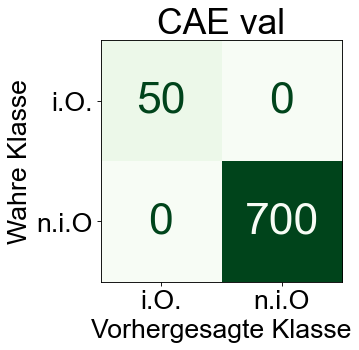

In [145]:
ch.plot_calc_cm(None, None, ["i.O.", "n.i.O"], cm=np.array(cms[3]), title=f"CAE val", figsize=(4,4), 
                dpi=80, fontsize=24, fontsize_cm=16)

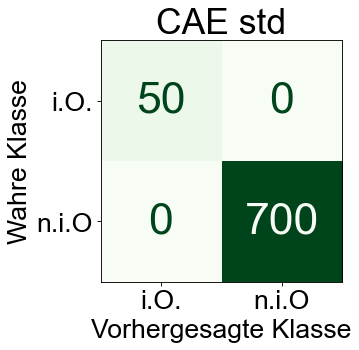

In [146]:
ch.plot_calc_cm(None, None, ["i.O.", "n.i.O"], cm=np.array(cms[4]), title=f"CAE std", figsize=(4,4), 
                dpi=80, fontsize=24, fontsize_cm=16)

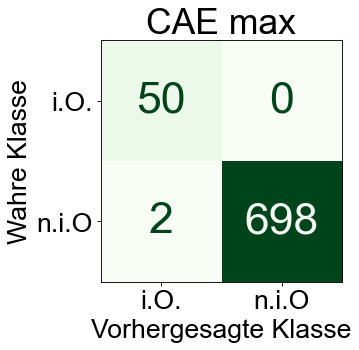

In [147]:
ch.plot_calc_cm(None, None, ["i.O.", "n.i.O"], cm=np.array(cms[5]), title=f"CAE max", figsize=(4,4), 
                dpi=80, fontsize=24, fontsize_cm=16)

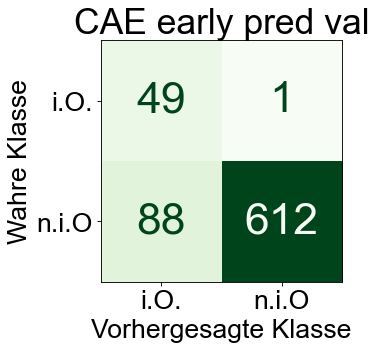

In [148]:
ch.plot_calc_cm(None, None, ["i.O.", "n.i.O"], cm=np.array(cms[6]), title=f"CAE early pred val", figsize=(4,4), 
                dpi=80, fontsize=24, fontsize_cm=16)

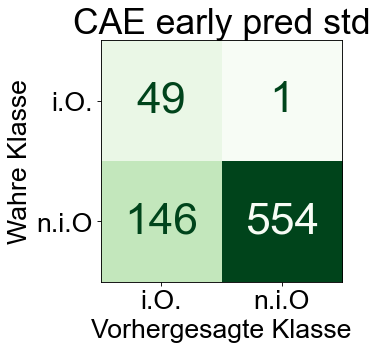

In [149]:
ch.plot_calc_cm(None, None, ["i.O.", "n.i.O"], cm=np.array(cms[7]), title=f"CAE early pred std", figsize=(4,4), 
                dpi=80, fontsize=24, fontsize_cm=16)

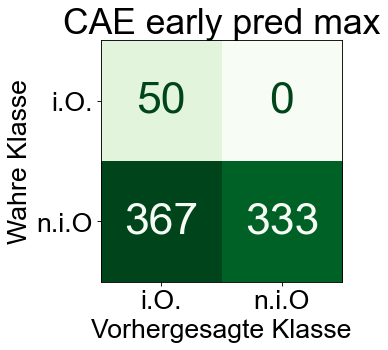

In [150]:
ch.plot_calc_cm(None, None, ["i.O.", "n.i.O"], cm=np.array(cms[8]), title=f"CAE early pred max", figsize=(4,4), 
                dpi=80, fontsize=24, fontsize_cm=16)

# 2. Plotting MLC transformation based BR results

In [6]:
with open("results/mlc_ml_br_hyperopt_results_v2.4.json", "r") as f:
    mlc_br = json.load(f)

In [7]:
mlc_br.keys()

dict_keys(['dt', 'rf', 'gb', 'xgb', 'knn', 'svm'])

In [17]:
rec0_br = []
subacc_br = []

for key in mlc_br:
    rec0_br.append(np.round(mlc_br[key]["rec_0"]*100, 1))
    subacc_br.append(np.round(mlc_br[key]["acc"]*100, 1))
    
rec0_br

[99.9, 100.0, 100.0, 100.0, 99.1, 99.3]

In [18]:
subacc_br

[69.7, 83.7, 83.9, 86.7, 61.3, 70.8]

In [21]:
xtickslist_br = [f"Decision\n Tree", f"Random\n Forest", f"Gradient\n Boost", f"XGBoost", 
                 f"K-Nearest-\n Neighbor", f"Support\n Vector\n Machine"]
xtickslist_br

['Decision\n Tree',
 'Random\n Forest',
 'Gradient\n Boost',
 'XGBoost',
 'K-Nearest-\n Neighbor',
 'Support\n Vector\n Machine']

In [48]:
print(importlib.reload(ch))

<module 'library.classification_helper' from 'C:\\Users\\songs\\OneDrive\\Desktop\\0. MA_FAPS\\04_Code\\library\\classification_helper.py'>


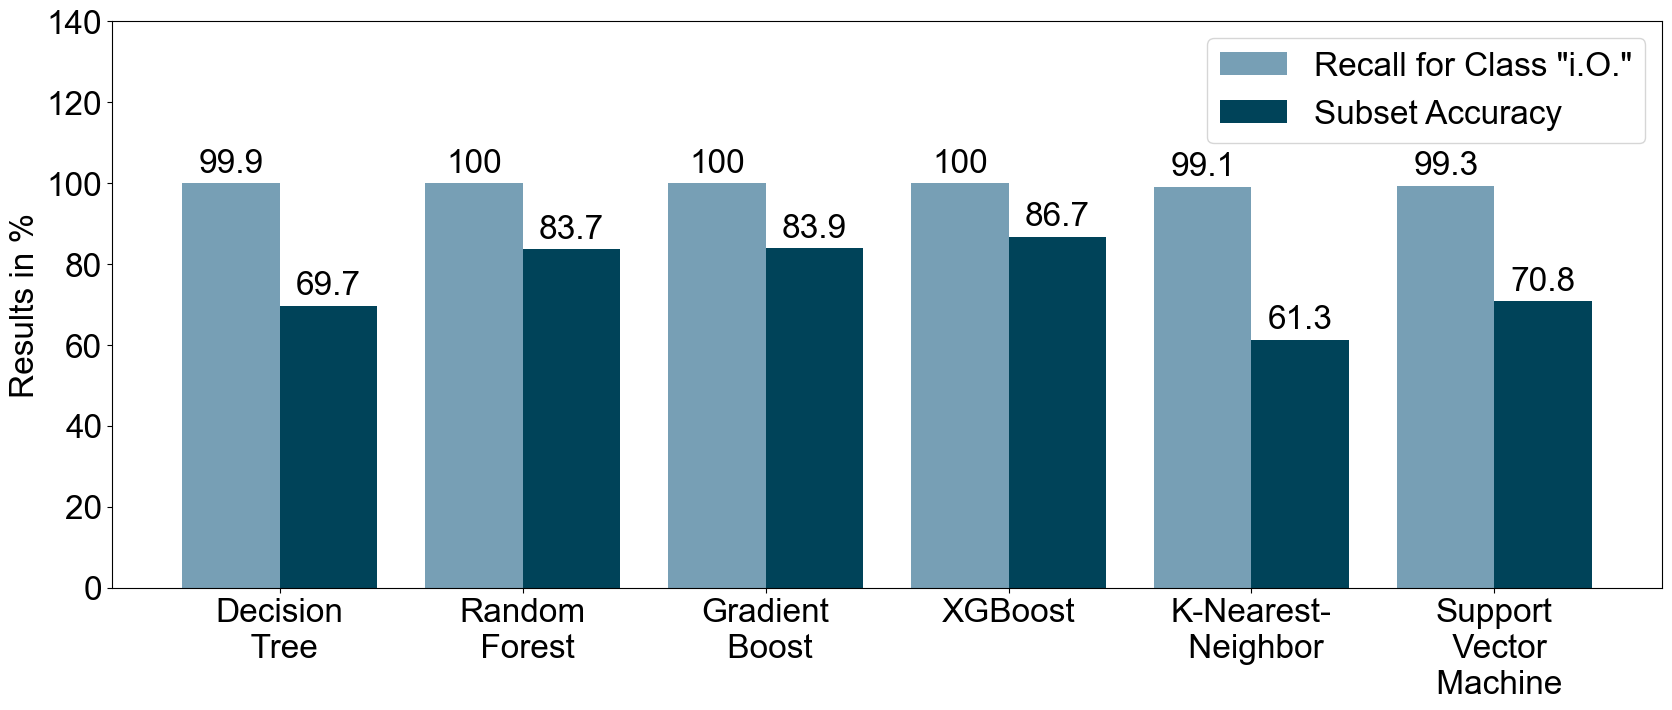

In [51]:
ch.grouped_barplot(leftlist=rec0_br, leftlabel='Recall for Class "i.O."', leftcolor=fapsc.turq_metallic, 
                   rightlist=subacc_br, rightlabel='Subset Accuracy', rightcolor=fapsc.turq_dark, 
                   title='', 
                   xtickslist=xtickslist_br, ylim=(0, 140),
                   size=(20,7.5), fontsize=24)

# 3. Plotting MLC adaption based results

In [8]:
with open("results/mlc_algorithm_adaption_hyperopt_results_v2.4.json", "r") as f:
    mlc_adapt = json.load(f)

In [9]:
mlc_adapt.keys()

dict_keys(['dt', 'rf', 'mlp', 'cnn_autokeras', 'cnn_optuna_tpe', 'cnn_optuna_random', 'cnn_kerastuner_hyperband', 'cnn_kerastuner_bayesian'])

In [13]:
rec0_adapt = []
subacc_adapt = []

for key in mlc_adapt:
    rec0_adapt.append(np.round(mlc_adapt[key]["rec_0"]*100, 1))
    subacc_adapt.append(np.round(mlc_adapt[key]["acc"]*100, 1))
    
rec0_adapt

[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]

In [14]:
subacc_adapt

[81.7, 89.7, 80.7, 89.2, 95.1, 92.0, 88.7, 92.1]

In [19]:
xtickslist_adapt = [f"Decision\n Tree", f"Random\n Forest", f"feature-\n based MLP", f"1D-CNN\n Autokeras", 
              f"1D-CNN\n Optuna\n TPE", f"1D-CNN\n Optuna\n Random", f"1D-CNN\n Kerastuner\n Hyperband", 
              f"1D-CNN\n Kerastuner\n Bayesian"]
xtickslist_adapt

['Decision\n Tree',
 'Random\n Forest',
 'feature-\n based MLP',
 '1D-CNN\n Autokeras',
 '1D-CNN\n Optuna\n TPE',
 '1D-CNN\n Optuna\n Random',
 '1D-CNN\n Kerastuner\n Hyperband',
 '1D-CNN\n Kerastuner\n Bayesian']

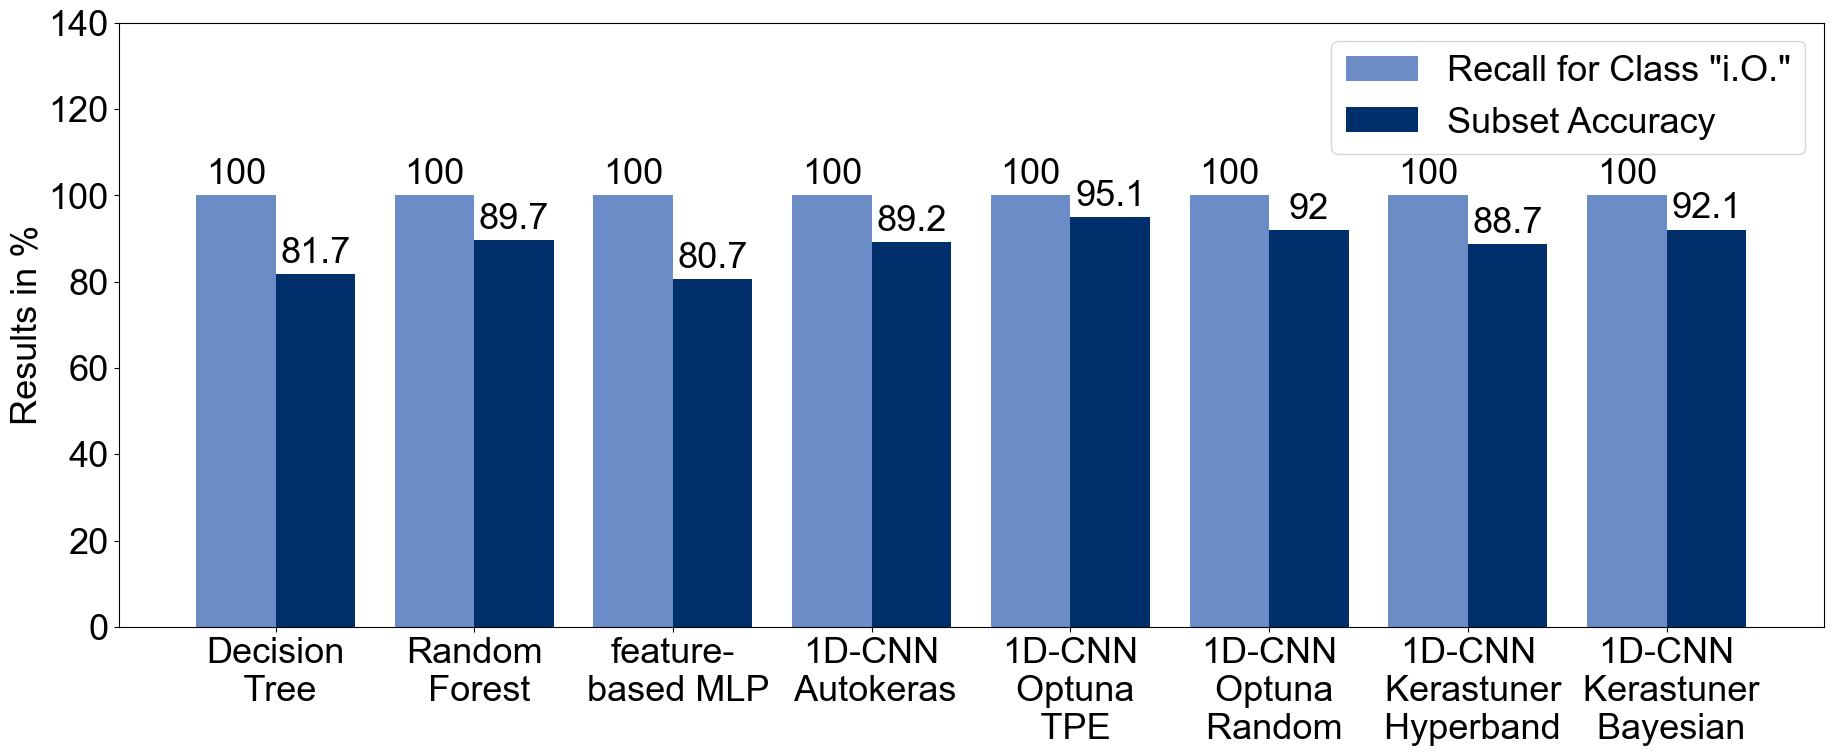

In [54]:
ch.grouped_barplot(leftlist=rec0_adapt, leftlabel='Recall for Class "i.O."', leftcolor=fapsc.blue_light, 
                   rightlist=subacc_adapt, rightlabel='Subset Accuracy', rightcolor=fapsc.blue, 
                   title='', 
                   xtickslist=xtickslist_adapt, ylim=(0, 140),
                   size=(22,8), fontsize=26)

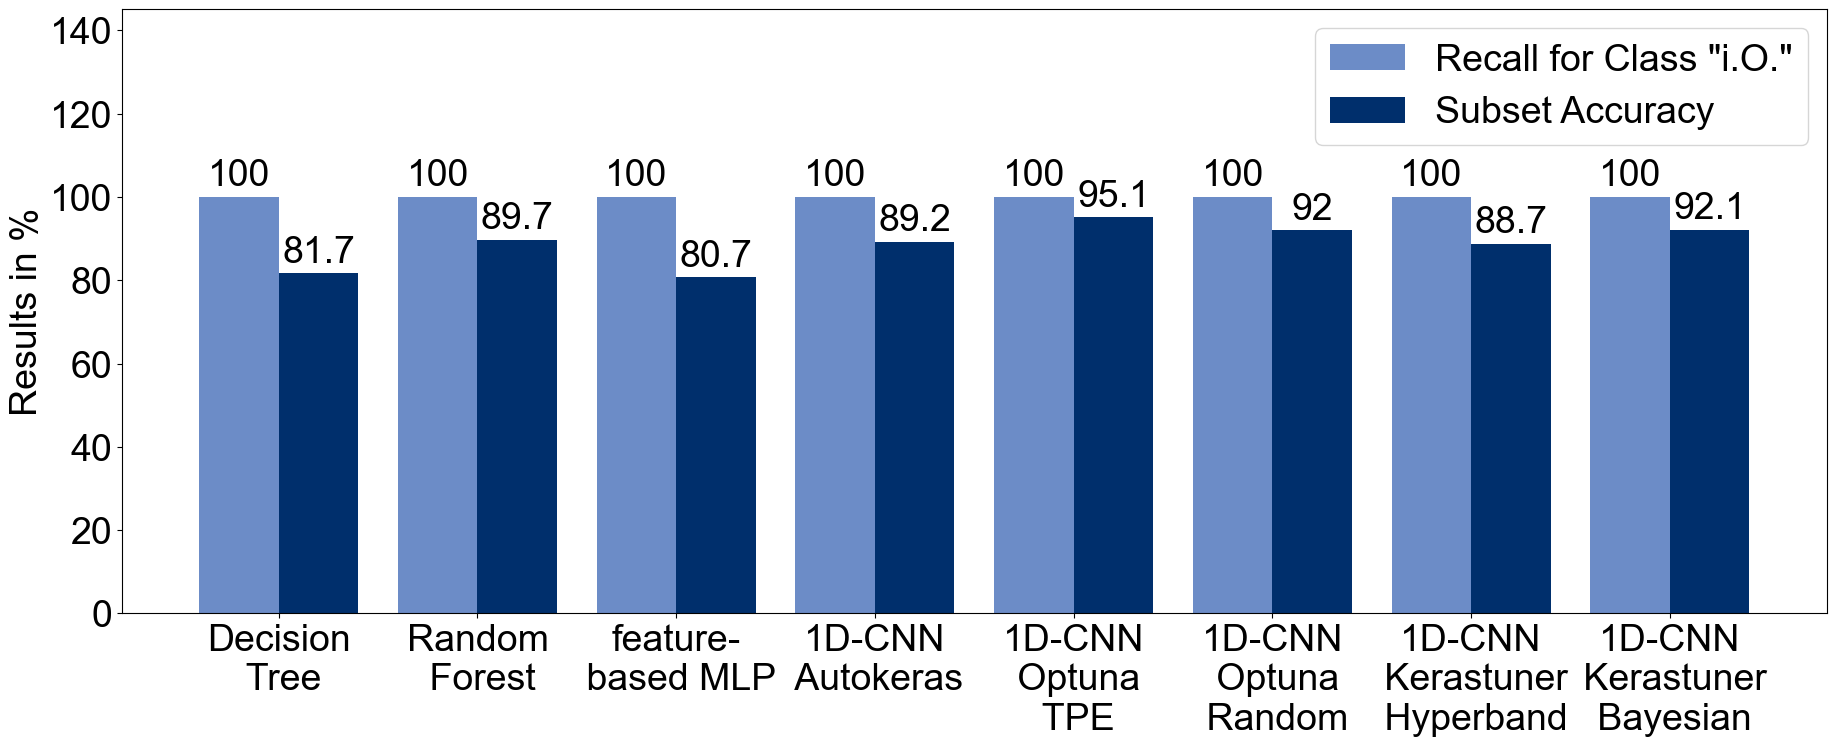

In [57]:
ch.grouped_barplot(leftlist=rec0_adapt, leftlabel='Recall for Class "i.O."', leftcolor=fapsc.blue_light, 
                   rightlist=subacc_adapt, rightlabel='Subset Accuracy', rightcolor=fapsc.blue, 
                   title='', 
                   xtickslist=xtickslist_adapt, ylim=(0, 145),
                   size=(22,8), fontsize=27)